# Data Analysis
This notebook is meant for exploritory analysis and in depth analysis of data on reddit users. Note: comments are not studied in this notebook because they are not central to the research (outside of determining pagerank) and they take a very long time to load.

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# Configurable constants
subreddit = "Showerthoughts"
download_date_string = "19.12.05-20:40:00"

data_directory = "data/"

# Derived constants
submissions_file = data_directory + subreddit + "-augmented-submissions-" + download_date_string + ".csv"
users_file = data_directory + subreddit + "-users-" + download_date_string + ".csv"

## Read Data

In [3]:
submissions = pd.read_csv(submissions_file, index_col=0)
submissions.head()

,index,submission_id,user,utc,score,title,body,subreddit,date,content,word_p_dist,entropy,novelty,transience,novelty_5,transience_5,impact,impact_5
0,977,e6eozq,victor_knight,1.575537e+09,11,We tend to think we're very advanced today but...,NaN,Showerthoughts,2019-12-05 09:07:33,We tend to think we're very advanced today but...,"{'We': 0.045454545454545456, 'tend': 0.0454545...",4.368523,NaN,8.892645,NaN,8.392191,NaN,NaN
1,976,e6epzy,GarunixReborn,1.575537e+09,109,The fact that people don’t walk up escalators ...,NaN,Showerthoughts,2019-12-05 09:10:45,The fact that people don’t walk up escalators ...,"{'The': 0.06666666666666667, 'fact': 0.0666666...",3.906891,9.341699,9.362215,NaN,9.132241,-0.020516,NaN
2,975,e6eqyr,Sable_Industries,1.575537e+09,0,Someone out there probably has the social secu...,NaN,Showerthoughts,2019-12-05 09:14:00,Someone out there probably has the social secu...,"{'Someone': 0.1, 'out': 0.1, 'there': 0.1, 'pr...",3.321928,9.936087,9.079592,NaN,9.212662,0.856496,NaN
3,974,e6es55,DUIofPussy,1.575537e+09,7,Since a person’s ability to comprehend is dete...,NaN,Showerthoughts,2019-12-05 09:17:54,Since a person’s ability to comprehend is dete...,"{'Since': 0.03333333333333333, 'a': 0.1, 'pers...",4.681728,8.259839,6.896594,NaN,7.185452,1.363246,NaN
4,973,e6es6v,-Hi_2019,1.575537e+09,9,If school isn't a place to play then home shou...,NaN,Showerthoughts,2019-12-05 09:18:07,If school isn't a place to play then home shou...,"{'If': 0.06666666666666667, 'school': 0.066666...",3.506891,6.737337,9.120991,NaN,9.080047,-2.383654,NaN


In [4]:
# a version of submissions without nan values
safe_submissions = submissions.drop('body', axis=1).dropna()

In [5]:
users = pd.read_csv(users_file, index_col=0)
users.head()

,num_posts,max_score_submissions,mean_score_submissions,min_score_submissions,mean_length_submissions,mean_impact,mean_novelty,mean_transience,mean_impact_5,mean_novelty_5,mean_transience_5,num_comments,max_score_comments,mean_score_comments,min_score_comments,mean_length_comments,pagerank
user,,,,,,,,,,,,,,,,,
--insertnamehere--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.000000,1.0,27.000000,0.000184
-AlienBoy-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,1.666667,1.0,67.333333,0.000184
-Asher-,1.0,0.0,0.0,0.0,48.0,0.025029,9.947869,9.922841,0.010955,9.752601,9.741647,NaN,NaN,NaN,NaN,NaN,0.000262
-DementedAvenger-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.000000,1.0,24.000000,0.000184
-Dubzyboy-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.000000,2.0,5.000000,0.000184


In [41]:
# a version of users without nans (removes a lot of comment info)
safe_users = users \
    .drop('num_comments', axis=1) \
    .drop('max_score_comments', axis=1) \
    .drop('mean_score_comments', axis=1) \
    .drop('min_score_comments', axis=1) \
    .drop('mean_length_comments', axis=1) \
    .dropna()

## Exploritory Data Analysis
Lets get a feel for the data

### Exploring Submissions

#### Simple Histograms

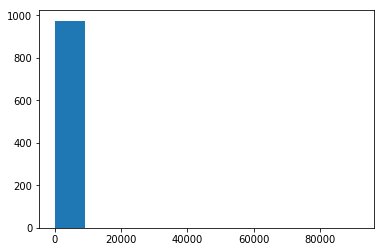

In [6]:
plt.hist(submissions['score'])
plt.show()

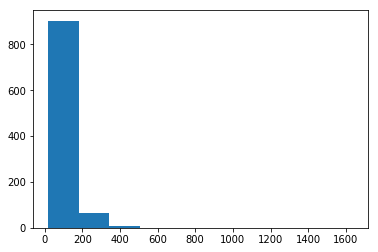

In [7]:
plt.hist(submissions['content'].apply(len))
plt.show()

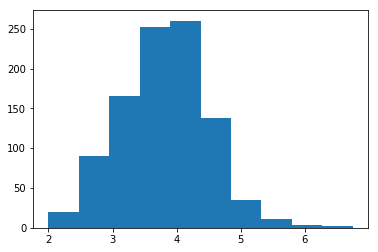

In [8]:
plt.hist(submissions['entropy'])
plt.show()

/home/mjkern/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mjkern/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


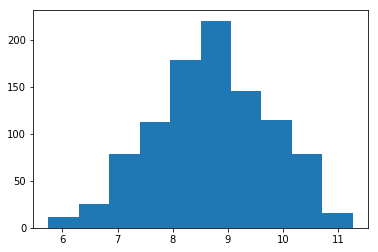

In [9]:
plt.hist(submissions['novelty'])
plt.show()

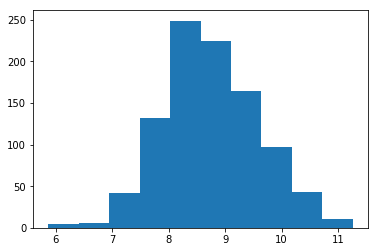

In [10]:
plt.hist(submissions['novelty_5'])
plt.show()

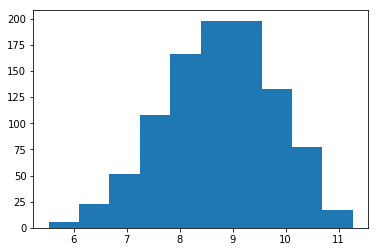

In [11]:
plt.hist(submissions['transience'])
plt.show()

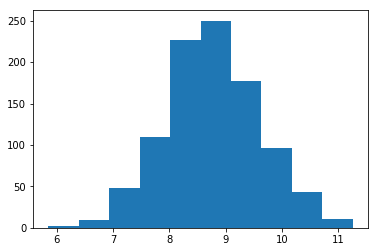

In [12]:
plt.hist(submissions['transience_5'])
plt.show()

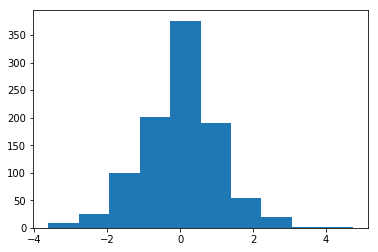

In [13]:
plt.hist(submissions['impact'])
plt.show()

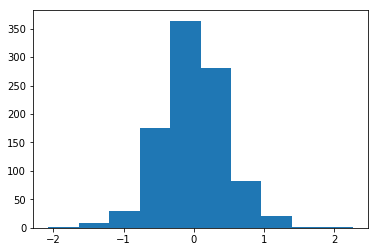

In [14]:
plt.hist(submissions['impact_5'])
plt.show()

#### Submission Scatterplots

slope: 2.2430368435313706
intercept: -72.56992834277918
r: 0.06438362092879288
r-squared: 0.004145250643902496
standard error: 1.1185887463984503


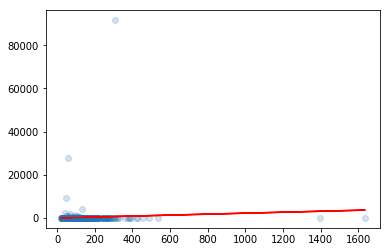

In [15]:
# scatterplot
x = safe_submissions['content'].apply(len)
y = safe_submissions['score']
plt.scatter(x, y, alpha=0.2)

# best fit line
m, b, r, p, std_err = stats.linregress(x, y)
print("slope: " + str(m))
print("intercept: " + str(b))
print("r: " + str(r))
print("r-squared: " + str(r**2))
print("standard error: " + str(std_err))
plt.plot(x, b + m * x, color="red")

plt.show()

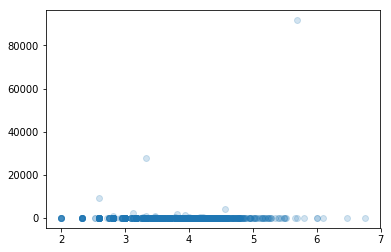

In [16]:
plt.scatter(x=submissions['entropy'], y=submissions['score'], alpha=0.2)

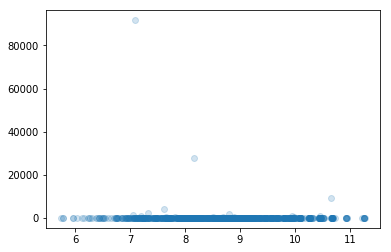

In [17]:
plt.scatter(x=submissions['novelty'], y=submissions['score'], alpha=0.2)
plt.show()

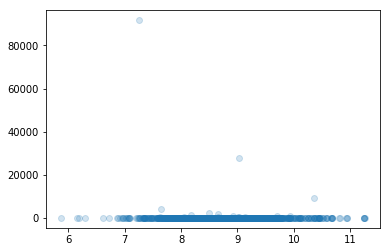

In [18]:
plt.scatter(x=submissions['novelty_5'], y=submissions['score'], alpha=0.2)
plt.show()

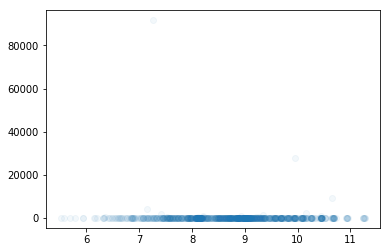

In [19]:
plt.scatter(x=submissions['transience'], y=submissions['score'], alpha=0.05)
plt.show()

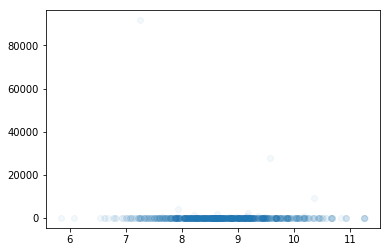

In [20]:
plt.scatter(x=submissions['transience_5'], y=submissions['score'], alpha=0.05)
plt.show()

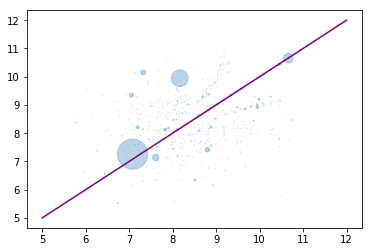

In [21]:
# novelty-transcience plot
plt.scatter(x=submissions['novelty'], y=submissions['transience'], s=submissions['score'] / 100, alpha=0.3)

# add line of equality
domain = np.arange(5, 13)
plt.plot(domain, domain, color='purple')

plt.show()

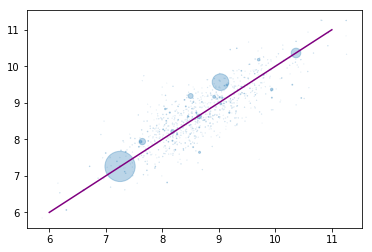

In [22]:
# novelty-transcience plot
plt.scatter(x=submissions['novelty_5'], y=submissions['transience_5'], s=submissions['score'] / 100, alpha=0.3)

# add line of equality
domain = np.arange(6, 12)
plt.plot(domain, domain, color='purple')

plt.show()

slope: -62.57309564662569
intercept: 155.32272628913293
r: -0.021241857652557778
r-squared: 0.00045121651653152745
standard error: 94.7564062460832


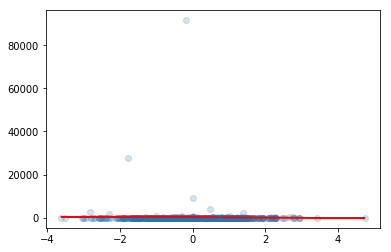

In [23]:
# scatterplot
x = safe_submissions['impact']
y = safe_submissions['score']
plt.scatter(x, y, alpha=0.2)

# best fit line
m, b, r, p, std_err = stats.linregress(x, y)
print("slope: " + str(m))
print("intercept: " + str(b))
print("r: " + str(r))
print("r-squared: " + str(r**2))
print("standard error: " + str(std_err))
plt.plot(x, b + m * x, color="red")

plt.show()

slope: -84.11103550352267
intercept: 156.13636514505865
r: -0.01256964121125371
r-squared: 0.00015799588017964764
standard error: 215.28175443968686


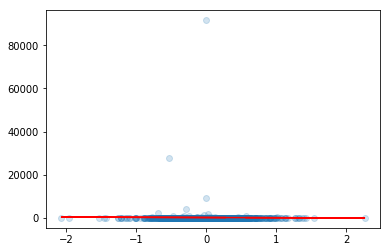

In [24]:
# scatterplot
x = safe_submissions['impact_5']
y = safe_submissions['score']
plt.scatter(x, y, alpha=0.2)

# best fit line
m, b, r, p, std_err = stats.linregress(x, y)
print("slope: " + str(m))
print("intercept: " + str(b))
print("r: " + str(r))
print("r-squared: " + str(r**2))
print("standard error: " + str(std_err))
plt.plot(x, b + m * x, color="red")

plt.show()

### Exploring Users

#### Simple Histograms

In [28]:
# helper to make this less redundant
def user_hist(column_name):
    plt.hist(users[column_name])
    plt.title("users " + column_name)
    plt.show()

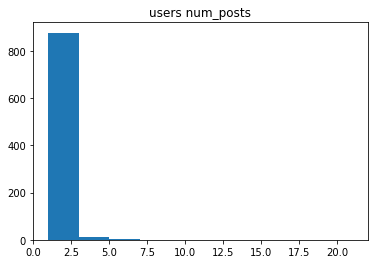

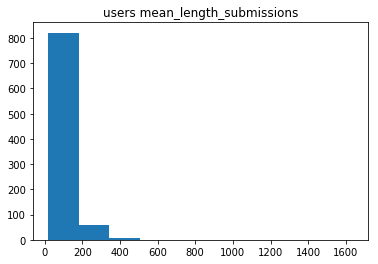

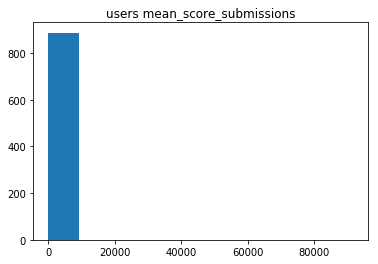

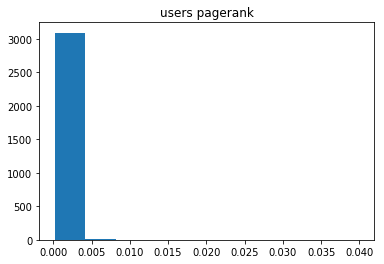

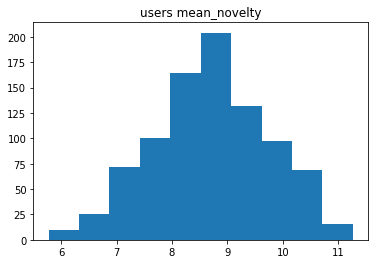

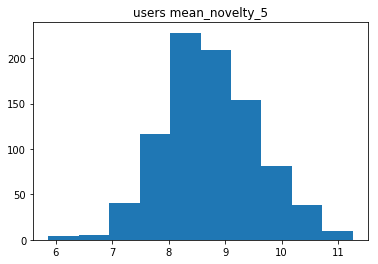

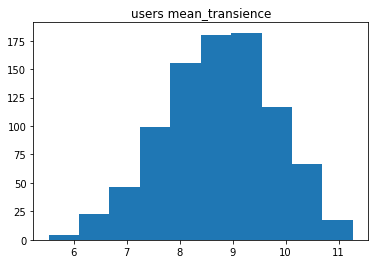

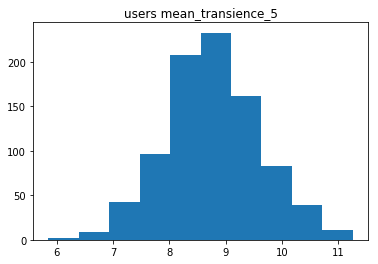

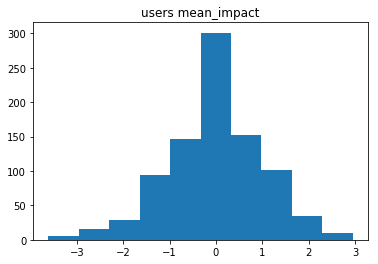

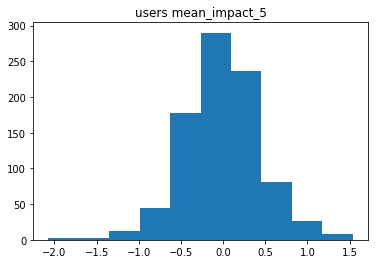

In [34]:
user_hist('num_posts')
user_hist('mean_length_submissions')
user_hist('mean_score_submissions')
user_hist('pagerank')
user_hist('mean_novelty')
user_hist('mean_novelty_5')
user_hist('mean_transience')
user_hist('mean_transience_5')
user_hist('mean_impact')
user_hist('mean_impact_5')

#### User Scatterplots

In [55]:
# a scatterplot and regression helper function
def user_scatter(x_col, y_col, alpha=0.2):
    x = safe_users[x_col]
    y = safe_users[y_col]
    
    # scatterplot
    plt.scatter(x, y, alpha=alpha)

    # best fit line
    m, b, r, p, std_err = stats.linregress(x, y)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("slope: " + str(m))
    print("intercept: " + str(b))
    print("r: " + str(r))
    print("r-squared: " + str(r**2))
    print("standard error: " + str(std_err))
    plt.plot(x, b + m * x, color="red")
    plt.title("users " + y_col + " vs " + x_col)

    plt.show()

In [56]:
safe_users.columns

Index(['num_posts', 'max_score_submissions', 'mean_score_submissions',
       'min_score_submissions', 'mean_length_submissions', 'mean_impact',
       'mean_novelty', 'mean_transience', 'mean_impact_5', 'mean_novelty_5',
       'mean_transience_5', 'pagerank'],
      dtype='object')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.00023496336205613898
intercept: 0.00040739735016980606
r: 0.12143039291651557
r-squared: 0.014745340323859355
standard error: 6.474491427921175e-05


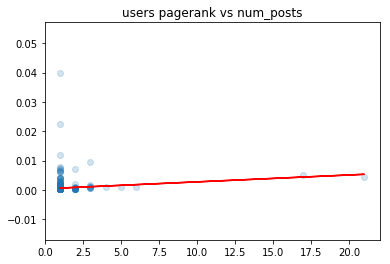

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 4.6712649627173947e-07
intercept: 0.0005868544806104656
r: 0.8452665645637069
r-squared: 0.7144755651693312
standard error: 9.954538161662088e-09


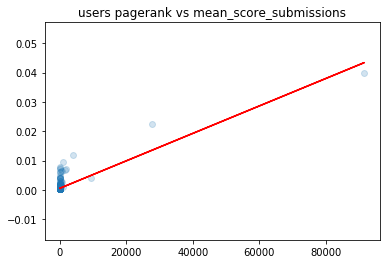

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 8.945549010068362e-07
intercept: 0.0005734913355268874
r: 0.04537844966576258
r-squared: 0.002059203694068148
standard error: 6.638476123970117e-07


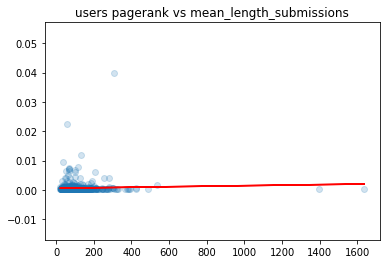

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -9.025950988566191e-05
intercept: 0.0014529686464193913
r: -0.05313393015909708
r-squared: 0.0028232145341518062
standard error: 5.718284699543215e-05


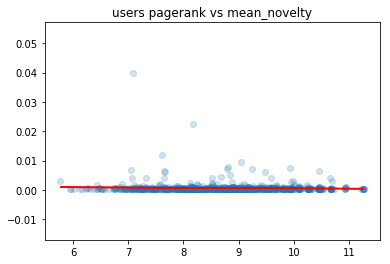

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.00010003316381357796
intercept: 0.001540805298199311
r: -0.04640230651742759
r-squared: 0.002153174050137303
standard error: 7.2593049420282e-05


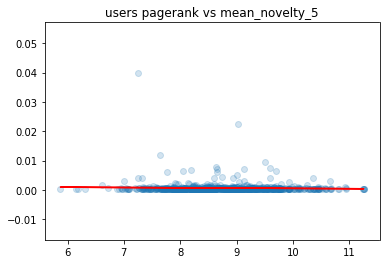

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -4.306904863279336e-05
intercept: 0.0010418989303316016
r: -0.025145044155267745
r-squared: 0.0006322732455703645
standard error: 5.7721046995277283e-05


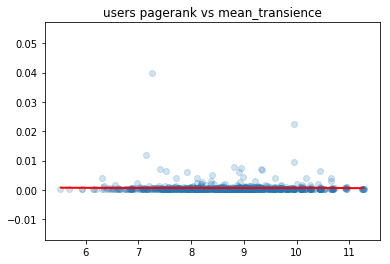

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -7.065159255977879e-05
intercept: 0.0012844874984298386
r: -0.03321600476257536
r-squared: 0.0011033029723874288
standard error: 7.166275730271306e-05


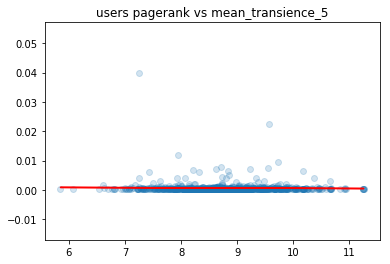

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -5.074565601988584e-05
intercept: 0.0006652233786523722
r: -0.0290378430836782
r-squared: 0.0008431963309523179
standard error: 5.888572224738597e-05


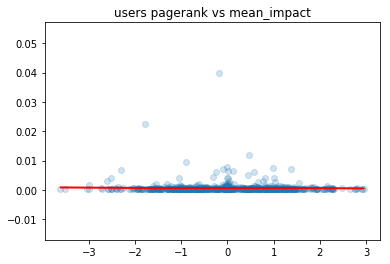

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -9.202765955232277e-05
intercept: 0.0006648846113514255
r: -0.023369072946190117
r-squared: 0.0005461135703643548
standard error: 0.00013271406063954544


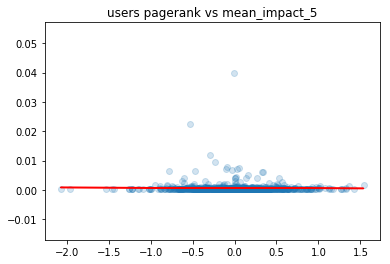

In [58]:
user_scatter('num_posts', 'pagerank')
user_scatter('mean_score_submissions', 'pagerank')
user_scatter('mean_length_submissions', 'pagerank')
user_scatter('mean_novelty', 'pagerank')
user_scatter('mean_novelty_5', 'pagerank')
user_scatter('mean_transience', 'pagerank')
user_scatter('mean_transience_5', 'pagerank')
user_scatter('mean_impact', 'pagerank')
user_scatter('mean_impact_5', 'pagerank')